In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\lb958\AppData\Local\Temp\ipykernel_6568\2099696251.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [139]:

print(df.head())

   Distance (µm)  C Kα1_2 (counts)  O Kα1 (counts)  O/C ratio  O/C smoothed  \
0       0.000000                 0               0        NaN           NaN   
1       0.419457                 0               0        NaN           NaN   
2       0.838914                 0               0        NaN           NaN   
3       1.258371                 2               1        0.5           NaN   
4       1.677828                 1               0        0.0           NaN   

   Distance (µm) normalised  
0                  0.000000  
1                  0.002004  
2                  0.004008  
3                  0.006012  
4                  0.008016  


In [146]:
from pybaselines import Baseline

def generate_baseline(x_data, y_data):
    baseline_fitter = Baseline(x_data = x_data)
    baseline = baseline_fitter.mor(y_data, half_window=5)[0]
    return baseline
from scipy import signal
def smooth_data(y_data):
    # returns data smoothened by a Savitzky-Golay filter
    return signal.savgol_filter(y_data, 100, 3)

    O/C smoothed  O/C ratio  C Kα1_2 (counts)  O Kα1 (counts)
0       0.195314   0.000000                 0               0
1       0.195039   0.000000                 0               0
2       0.194945   0.000000                 0               0
3       0.195026   0.500000                 2               1
4       0.195277   0.000000                 1               0
5       0.195691   0.000000                 1               0
6       0.196263   0.000000                 0               2
7       0.196985   0.000000                 0               0
8       0.197853   2.000000                 1               2
9       0.198861   1.000000                 1               1
10      0.200001   0.000000                 1               0
11      0.201269   0.000000                 0               0
12      0.202658   0.000000                 0               0
13      0.204162   0.000000                 0               0
14      0.205775   0.000000                 1               0
15      

Text(0.5, 1.0, 'O and C EDX spectra')

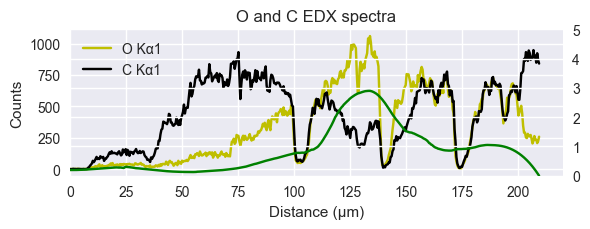

In [168]:
# df.plot(x='Distance (µm)', y='O Kα1 (counts)')
edx_linedata_path = r"c:\Users\lb958\OneDrive - University of Cambridge\Data\Midi\EDX\23.07.17 MWCNTs DC 500mAg\reports\Line Data 1.csv"

df = pd.read_csv(edx_linedata_path)
df = df.drop(['Unnamed: 3'], axis=1)
fig, ax = plt.subplots(figsize=(6, 2.4), layout='tight')
ax.plot(df['Distance (µm)'], df['O Kα1 (counts)'], label = "O Kα1",color='y')
ax.plot(df['Distance (µm)'], df['C Kα1_2 (counts)'], label = "C Kα1",color='k')

df['O/C ratio'] = (df['O Kα1 (counts)']/df['C Kα1_2 (counts)'])
# replace NaN and inf with O in O/C ratio
df['O/C ratio'] = df['O/C ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

df['O/C smoothed'] = smooth_data(y_data=df['O/C ratio'])
print(df[['O/C smoothed','O/C ratio','C Kα1_2 (counts)','O Kα1 (counts)']].iloc[:20])
ax2 = ax.twinx()
# print(df['O/C ratio'].max())
# df['O/C ratio'] = (df['O/C ratio']/df['O/C ratio'].max())*df['C Kα1_2 (counts)'].max()
# ax2.plot(df['Distance (µm)'], df['O/C ratio'], label = "O/C ratio",color='r')
ax2.plot(df['Distance (µm)'], df['O/C smoothed'], label = "O/C ratio",color='g')
ax2.set_ylim(0,5)



ax.set_xlim(0,)
ax.set_xlabel('Distance (µm)')
ax.set_ylabel('Counts')
ax.legend()
ax.set_title('O and C EDX spectra')




<class 'matplotlib.lines.Line2D'>
<class 'matplotlib.lines.Line2D'>


Text(0.5, 1.0, 'O and C EDX spectra')

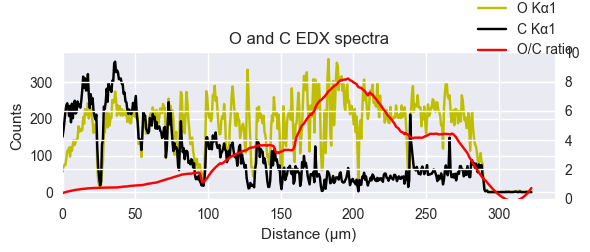

In [169]:
# df.plot(x='Distance (µm)', y='O Kα1 (counts)')
df_pat = pd.read_csv(r"C:\Users\lb958\OneDrive - University of Cambridge\Data\Midi\EDX\23.08.01 MWCNTs pat 500mAg\Project 1\reports\Line Data 3.csv")
fig, ax = plt.subplots(figsize=(6, 2.4), layout='tight')
ax2 = ax.twinx()
line1, = ax.plot(df_pat['Distance (µm)'], df_pat['O Kα1 (counts)'], label = "O Kα1",color='y')
line2, = ax.plot(df_pat['Distance (µm)'], df_pat['C Kα1_2 (counts)'], label = "C Kα1",color='k')
# generate column of O/C ratio normalised to have the same max value as the max of O Kα1
df_pat['O/C ratio'] = (df_pat['O Kα1 (counts)']/df_pat['C Kα1_2 (counts)'])
df_pat['O/C ratio'] = df_pat['O/C ratio'].fillna(0)
df_pat['O/C ratio'] = df_pat['O/C ratio'].replace(np.inf, 0)
# #make the max of O/C ratio the same as the max of O Kα1
# df['O/C ratio'] = (df['O/C ratio']/df['O/C ratio'].max())*df['O Kα1 (counts)'].max()
df_pat['O/C baseline'] = generate_baseline(df_pat['Distance (µm)'],df_pat['O/C ratio'])
df_pat['O/C smoothed'] = smooth_data(y_data=df_pat['O/C ratio'])



# print(df['O/C ratio'].max())
# df['O/C ratio'] = (df['O/C ratio']/df['O/C ratio'].max())*df['C Kα1_2 (counts)'].max()
# ax2.plot(df['Distance (µm)'], df['O/C ratio'], label = "O/C ratio",color='r')
# ax2.plot(df['Distance (µm)'], df['O/C baseline'], label = "O/C baseline",color='b')
line3, = ax2.plot(df_pat['Distance (µm)'], df_pat['O/C smoothed'], label = "O/C ratio",color='r')
print(type(line3))
ax2.set_ylim(0,10)



ax.set_xlim(0,)
ax.set_xlabel('Distance (µm)')
ax.set_ylabel('Counts')
lines = [line1, line2, line3]
print(type(lines[0]))
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc = (0.8,0.75))
ax.set_title('O and C EDX spectra')



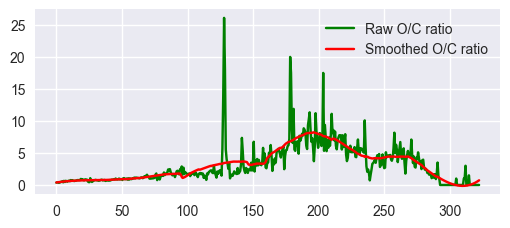

In [170]:
# plot O/C ratio and O/C smoothed on the same plot
fig, ax = plt.subplots(figsize=(6, 2.4))
ax.plot(df_pat['Distance (µm)'],df_pat['O/C ratio'], label = 'Raw O/C ratio', color = 'g')
ax.plot(df_pat['Distance (µm)'],df_pat['O/C smoothed'], label = 'Smoothed O/C ratio', color = 'r')
ax.legend()

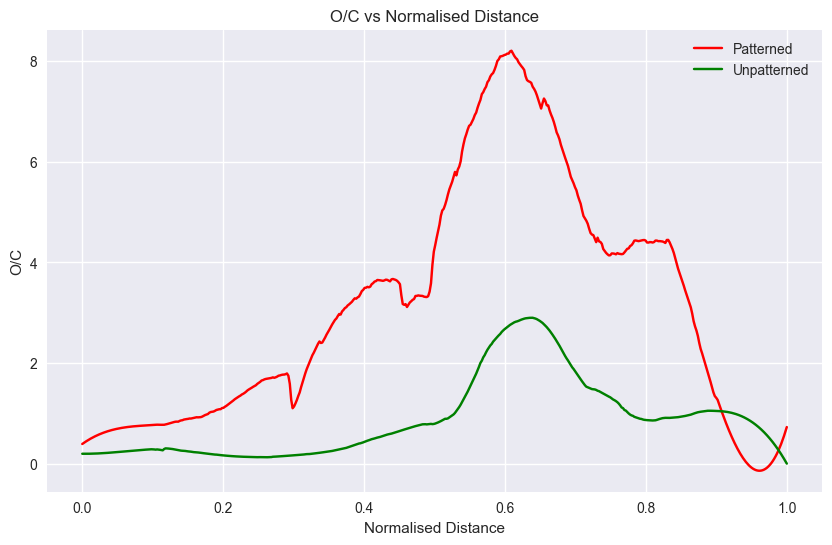

In [171]:
fig, ax = plt.subplots(figsize=(10, 6))

# Normalise the distance columns on both dataframes
df_pat['Distance (µm) normalised'] = df_pat['Distance (µm)'] / df_pat['Distance (µm)'].max()
df['Distance (µm) normalised'] = df['Distance (µm)'] / df['Distance (µm)'].max()
# Normalise the O/C columns on both dataframes
df_pat['O/C smoothed normalised'] = df_pat['O/C smoothed'] / df_pat['O/C smoothed'].max()
df['O/C smoothed normalised'] = df['O/C smoothed'] / df['O/C smoothed'].max()

# Plot the normalised data
ax.plot(df_pat['Distance (µm) normalised'], df_pat['O/C smoothed'], label='Patterned', color='red')
ax.plot(df['Distance (µm) normalised'], df['O/C smoothed'], label='Unpatterned', color='green')

ratio_of_ratios = df_pat['O/C smoothed'] / df['O/C smoothed']
ax.set_xlabel('Normalised Distance')
ax.set_ylabel('O/C')
ax.set_title('O/C vs Normalised Distance')
ax.legend()


Text(0.5, 1.0, 'O/C vs Normalised Distance')

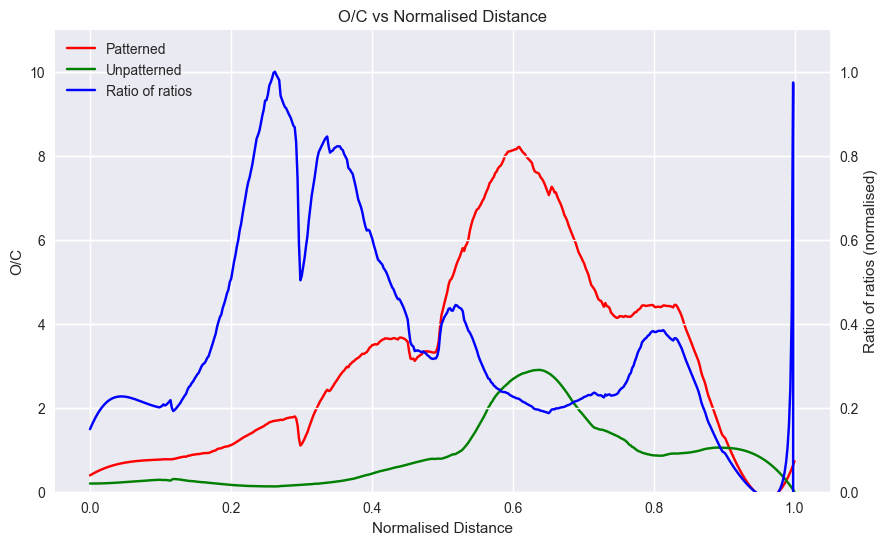

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))

# Normalise the distance columns on both dataframes
df_pat['Distance (µm) normalised'] = df_pat['Distance (µm)'] / df_pat['Distance (µm)'].max()
df['Distance (µm) normalised'] = df['Distance (µm)'] / df['Distance (µm)'].max()
# Normalise the O/C columns on both dataframes
df_pat['O/C smoothed normalised'] = df_pat['O/C smoothed'] / df_pat['O/C smoothed'].max()
df['O/C smoothed normalised'] = df['O/C smoothed'] / df['O/C smoothed'].max()

line1, = ax.plot(df_pat['Distance (µm) normalised'], df_pat['O/C smoothed'], label = "Patterned",color='r')
line2, = ax.plot(df['Distance (µm) normalised'], df['O/C smoothed'], label = "Unpatterned",color='g')
ratio_of_ratios = df_pat['O/C smoothed'] / df['O/C smoothed']
ratio_of_ratios = ratio_of_ratios / ratio_of_ratios.max()



ax2 = ax.twinx()
line3, = ax2.plot(df['Distance (µm) normalised'], ratio_of_ratios, label = "Ratio of ratios",color='b')
ax.set_ylim(0, 11)
ax2.set_ylim(0,1.1)
ax.set_xlabel('Normalised Distance')
ax.set_ylabel('O/C')
ax2.set_ylabel('Ratio of ratios (normalised)')
lines = [line1, line2, line3]
ax2.legend(lines, [l.get_label() for l in lines])
ax.set_title('O/C vs Normalised Distance')


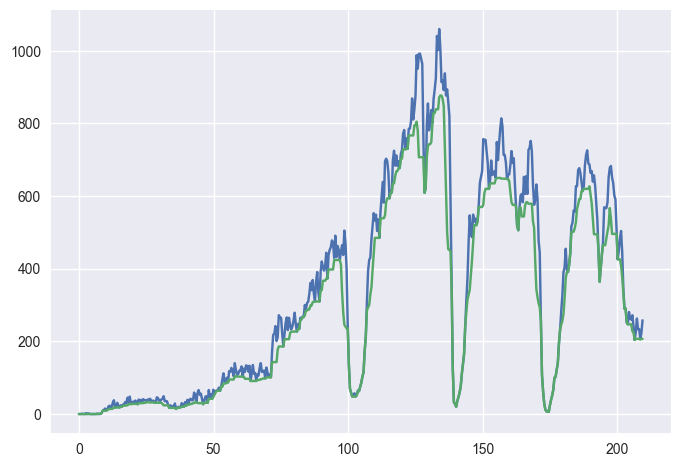

In [173]:
plt.plot(df['Distance (µm)'], df['O Kα1 (counts)'])
plt.plot(df['Distance (µm)'], generate_baseline(df['Distance (µm)'], df['O Kα1 (counts)']))
plt.show()

In [183]:
from pybaselines import Baseline

def generate_baseline(x_data, y_data):
    baseline_fitter = Baseline(x_data = x_data)
    baseline = baseline_fitter.mor(y_data, half_window=20)[0]
    return baseline

In [184]:
from scipy.signal import medfilt

def generate_baseline_medfilt(y_data):
    baseline = medfilt(y_data, 31)
    return baseline

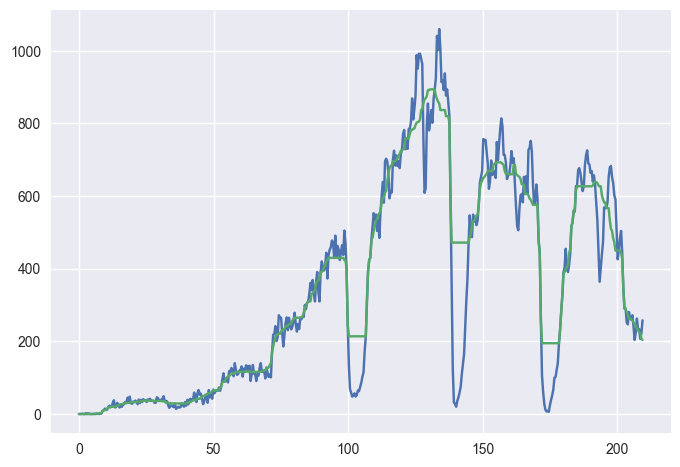

In [185]:
plt.plot(df['Distance (µm)'], df['O Kα1 (counts)'])
plt.plot(df['Distance (µm)'], generate_baseline_medfilt(df['O Kα1 (counts)']))
plt.show()

C:\Users\lb958\AppData\Local\Temp\ipykernel_6568\656752009.py:1: RuntimeWarning: divide by zero encountered in divide
  inverse_counts = 1/np.array(df['O Kα1 (counts)'])


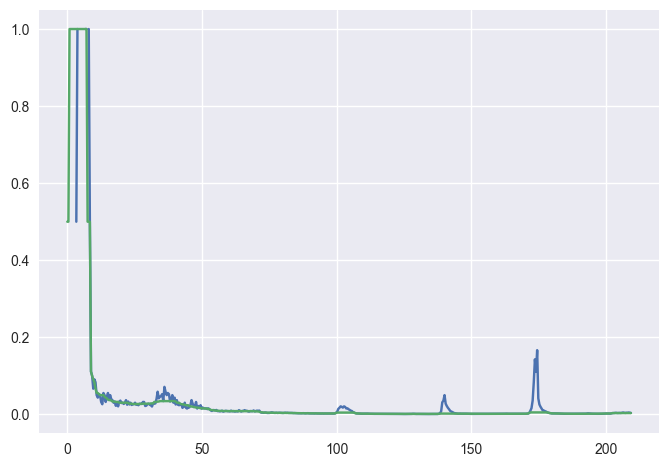

C:\Users\lb958\AppData\Local\Temp\ipykernel_6568\656752009.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(df['Distance (µm)'], 1/(inverse_counts-generate_baseline_medfilt(inverse_counts)))


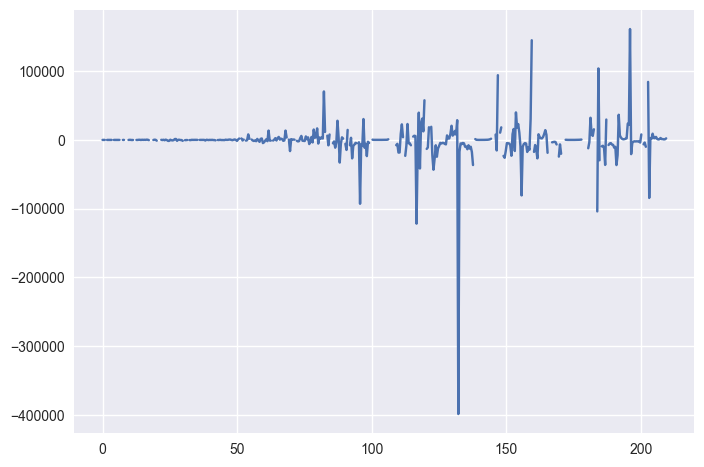

In [186]:
inverse_counts = 1/np.array(df['O Kα1 (counts)'])

plt.plot(df['Distance (µm)'], inverse_counts)
plt.plot(df['Distance (µm)'], generate_baseline_medfilt(inverse_counts))
plt.show()
plt.plot(df['Distance (µm)'], 1/(inverse_counts-generate_baseline_medfilt(inverse_counts)))

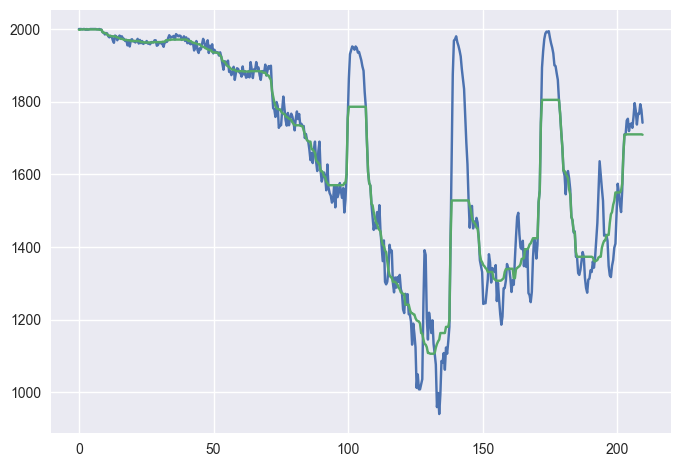

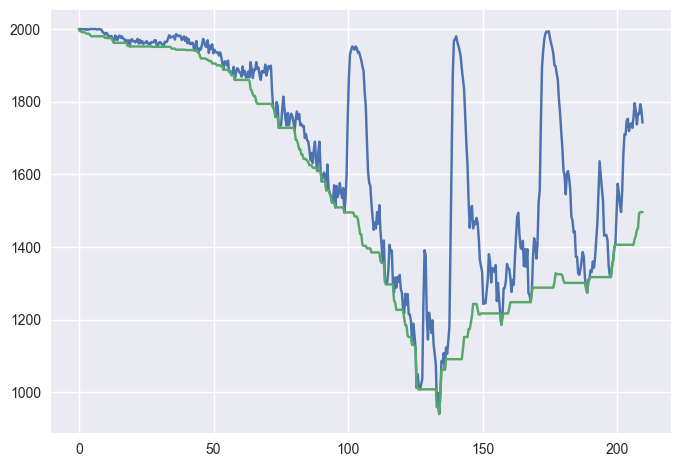

In [187]:
reversed_counts = (np.array(df['O Kα1 (counts)'])*-1)+2000

plt.plot(df['Distance (µm)'], reversed_counts)
plt.plot(df['Distance (µm)'], generate_baseline_medfilt(reversed_counts))
plt.show()
plt.plot(df['Distance (µm)'], reversed_counts)

plt.plot(df['Distance (µm)'], generate_baseline(df['Distance (µm)'],reversed_counts))
plt.show()
# plt.plot(df['Distance (µm)'], 1/(inverse_counts-generate_baseline_medfilt(reversed_counts)))